In [1]:
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv(r'C:\Users\deyar\OneDrive\Desktop\MarketingCampaignClustring\notebooks\data\Online Retail (1).csv',encoding='ISO-8859-1')

In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom


In [6]:
data['total_bill']=data['Quantity']*data['UnitPrice']

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_bill
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom,20.34


In [8]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
total_bill          0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(401604, 9)

In [12]:
d1=data.groupby('CustomerID').agg({'InvoiceNo':'count',
                                  'Quantity':'sum',
                                   'total_bill':'sum'})

In [13]:
d1.columns=['invoice_frequency','total_quantity','total_bill']

In [14]:
d1.head()

,invoice_frequency,total_quantity,total_bill
CustomerID,,,
12346.0,2,0,0.00
12347.0,182,2458,4310.00
12348.0,31,2341,1797.24
12349.0,73,631,1757.55
12350.0,17,197,334.40


In [15]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [16]:
latest_date=data['InvoiceDate'].max()

In [17]:
data['day_gap']=(latest_date-data['InvoiceDate'])

In [18]:
d2=data.groupby('CustomerID')['day_gap'].min().reset_index()

In [19]:
d2['day_gap']=d2['day_gap'].dt.days

In [20]:
d12=pd.merge(d1,d2,on='CustomerID',how='inner')

In [21]:
d12.head()

,CustomerID,invoice_frequency,total_quantity,total_bill,day_gap
0,12346.0,2,0,0.00,325
1,12347.0,182,2458,4310.00,1
2,12348.0,31,2341,1797.24,74
3,12349.0,73,631,1757.55,18
4,12350.0,17,197,334.40,309


In [22]:
d3=data.groupby('CustomerID')['Country'].unique().reset_index()

In [23]:
d3.head()

,CustomerID,Country
0,12346.0,[United Kingdom]
1,12347.0,[Iceland]
2,12348.0,[Finland]
3,12349.0,[Italy]
4,12350.0,[Norway]


In [24]:
x=list(d3['Country'].values)

In [26]:
m=[]
for i in range(len(x)):
   c=str(x[i][0])
   m.append(c)

In [27]:
d3['country']=m

In [28]:
d3.drop('Country',axis=1,inplace=True)

In [29]:
df1=pd.merge(d12,d3,on='CustomerID',how='inner')
df1.head()

,CustomerID,invoice_frequency,total_quantity,total_bill,day_gap,country
0,12346.0,2,0,0.00,325,United Kingdom
1,12347.0,182,2458,4310.00,1,Iceland
2,12348.0,31,2341,1797.24,74,Finland
3,12349.0,73,631,1757.55,18,Italy
4,12350.0,17,197,334.40,309,Norway


In [30]:
df=df1.copy()

In [32]:
from sklearn.preprocessing import OrdinalEncoder
c=list(pd.unique(df['country']))
o=OrdinalEncoder(categories=[c])
df['country_code']=o.fit_transform(df[['country']])


In [33]:
df.drop('country',axis=1,inplace=True)

In [34]:
df_clean=df.drop(['CustomerID','country_code','total_quantity'],axis=1)

In [35]:
df_clean.head()

,invoice_frequency,total_bill,day_gap
0,2,0.00,325
1,182,4310.00,1
2,31,1797.24,74
3,73,1757.55,18
4,17,334.40,309


In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.metrics import silhouette_score

In [37]:
df_final=df_clean[df_clean['total_bill']>0]

In [38]:
m=MinMaxScaler()
v=m.fit_transform(df_final)
d_sc=pd.DataFrame(v,columns=df_clean.columns)
d_sc.head()

,invoice_frequency,total_bill,day_gap
0,0.023172,0.015421,0.002681
1,0.003841,0.006430,0.198391
2,0.009218,0.006288,0.048257
3,0.002048,0.001196,0.828418
4,0.012034,0.005529,0.093834


In [39]:
import optuna

In [42]:
def objective(trial):
    n_clusters=trial.suggest_int('n_clusters',3,6)
    max_iter=trial.suggest_int('max_iter',1000,5000)
    model=KMeans(n_clusters=n_clusters,max_iter=max_iter)
    model.fit(d_sc)
    silhouette = silhouette_score(d_sc,model.labels_)
    return silhouette

In [43]:
study=optuna.create_study(direction='maximize')

[I 2024-05-11 17:00:49,927] A new study created in memory with name: no-name-ada2dfaa-937e-435d-a931-1972326f8359


In [44]:
study.optimize(objective,n_trials=25)

[I 2024-05-11 17:00:51,179] Trial 0 finished with value: 0.5600974946401154 and parameters: {'n_clusters': 5, 'max_iter': 2818}. Best is trial 0 with value: 0.5600974946401154.
[I 2024-05-11 17:00:51,491] Trial 1 finished with value: 0.5732528700346842 and parameters: {'n_clusters': 5, 'max_iter': 3744}. Best is trial 1 with value: 0.5732528700346842.
[I 2024-05-11 17:00:51,763] Trial 2 finished with value: 0.6562835443433934 and parameters: {'n_clusters': 3, 'max_iter': 2894}. Best is trial 2 with value: 0.6562835443433934.
[I 2024-05-11 17:00:52,028] Trial 3 finished with value: 0.582322289241668 and parameters: {'n_clusters': 6, 'max_iter': 1296}. Best is trial 2 with value: 0.6562835443433934.
[I 2024-05-11 17:00:52,295] Trial 4 finished with value: 0.5732528700346842 and parameters: {'n_clusters': 5, 'max_iter': 4179}. Best is trial 2 with value: 0.6562835443433934.
[I 2024-05-11 17:00:52,543] Trial 5 finished with value: 0.5795040316925727 and parameters: {'n_clusters': 4, 'max_i

In [45]:
study.best_params

{'n_clusters': 3, 'max_iter': 3419}

In [46]:
study.best_value

0.7287816370870628

In [47]:
k=KMeans(n_clusters=3,max_iter=3419)

In [48]:
label=k.fit_predict(d_sc)

In [49]:
df_final['label']=label

In [50]:
df_final['label'].value_counts()

label
0    2911
2     804
1     607
Name: count, dtype: int64

In [51]:
import seaborn as sn
import matplotlib.pyplot as pl

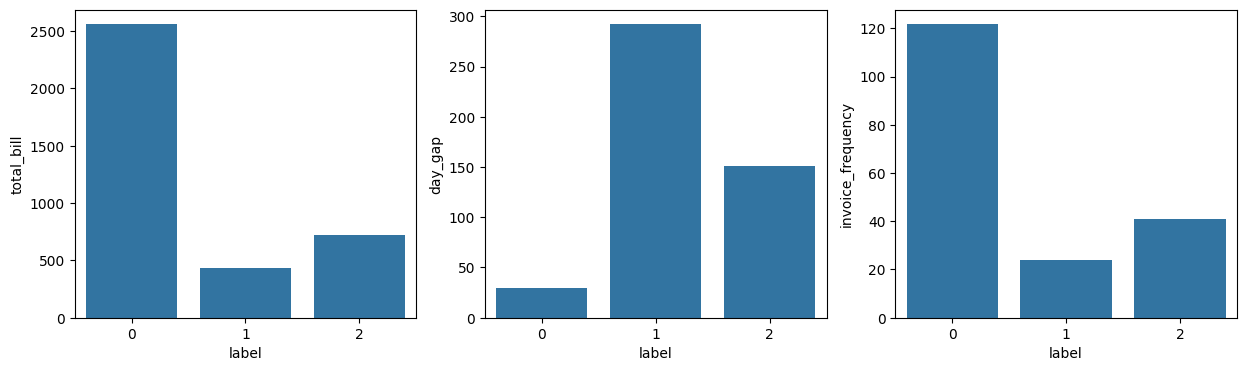

In [52]:
pl.figure(figsize=(15,4))
pl.subplot(1,3,1)
sn.barplot(data=df_final,x='label',y='total_bill',ci=False)
pl.subplot(1,3,2)
sn.barplot(data=df_final,x='label',y='day_gap',ci=False)
pl.subplot(1,3,3)
sn.barplot(data=df_final,x='label',y='invoice_frequency',ci=False)
pl.show()

 1.cluster 0= high total_bill,low day_gap or active user.

 2.cluster 2=medium total_bill,medium day_gap,user may active or not.

3.cluster 1=very low total_bill,high day_gap or user is not active.

In [53]:
model_data=df1[df1['total_bill']>0]

In [54]:
model_data.head()

,CustomerID,invoice_frequency,total_quantity,total_bill,day_gap,country
1,12347.0,182,2458,4310.00,1,Iceland
2,12348.0,31,2341,1797.24,74,Finland
3,12349.0,73,631,1757.55,18,Italy
4,12350.0,17,197,334.40,309,Norway
5,12352.0,95,470,1545.41,35,Norway


In [55]:
model_data['category']=label

In [56]:
model_data.head()

,CustomerID,invoice_frequency,total_quantity,total_bill,day_gap,country,category
1,12347.0,182,2458,4310.00,1,Iceland,0
2,12348.0,31,2341,1797.24,74,Finland,0
3,12349.0,73,631,1757.55,18,Italy,0
4,12350.0,17,197,334.40,309,Norway,1
5,12352.0,95,470,1545.41,35,Norway,0


In [61]:
import os

In [67]:
model_path=os.path.join("data","model.csv")

In [68]:
model_data.to_csv(model_path,index=False) 